In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cardio_train.csv", sep=";")

In [3]:
#create new variable bmi
#BMI = kg/(m^2)

df["bmi"] = df["weight"]/((df["height"]/100)**2)

Plot histograms of each variable, split by cardio

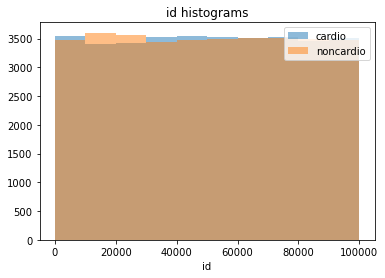

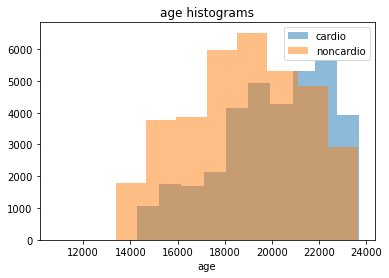

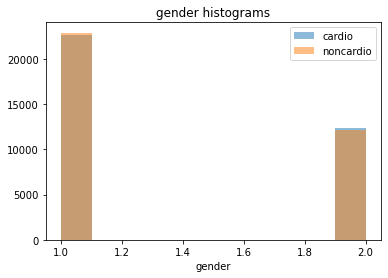

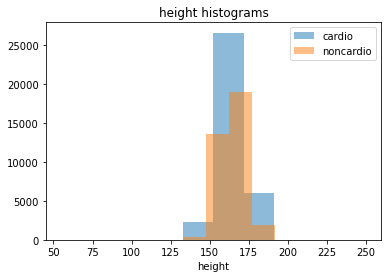

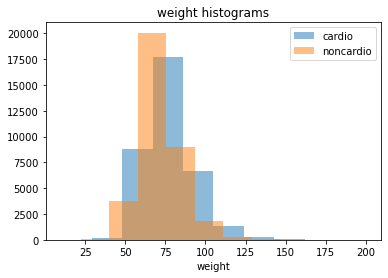

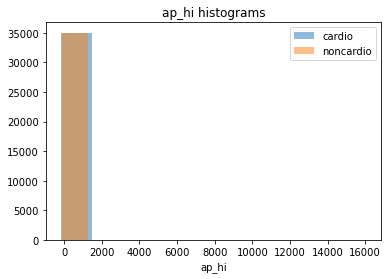

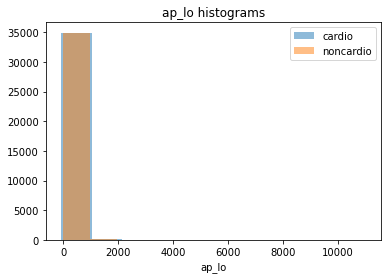

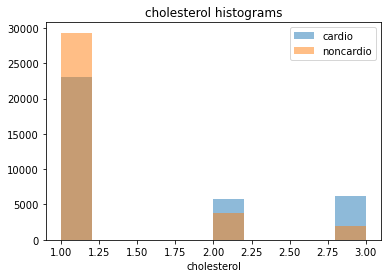

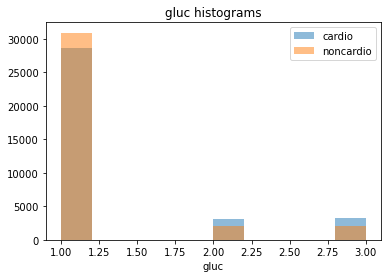

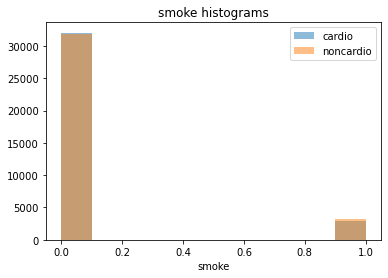

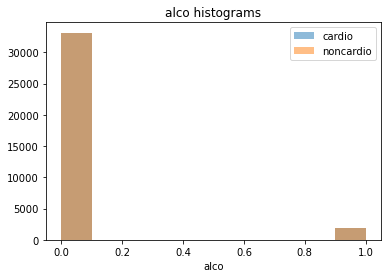

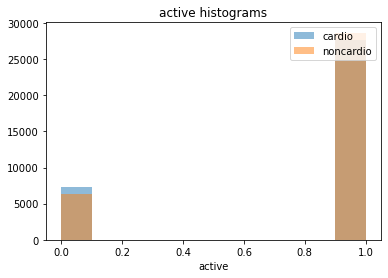

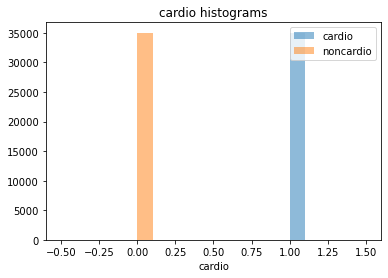

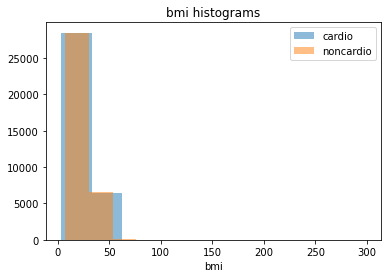

In [4]:
cardio = df[df["cardio"]==1]
noncardio = df[df["cardio"]==0]

for col in df.columns:
    plt.hist(cardio[col], alpha=0.5, label='cardio')
    plt.hist(noncardio[col], alpha=0.5, label='noncardio')
    plt.title(col + " histograms")
    plt.xlabel(col)
    plt.legend(loc='upper right')
    plt.show()



In [5]:
#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df))

[0.14851817 0.13839997]


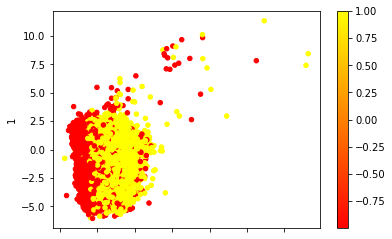

<Figure size 432x288 with 0 Axes>

In [7]:
#PCA with scaled data

from sklearn.decomposition import PCA

X = df_scaled
y = df_scaled[12]

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

print(pca.explained_variance_ratio_)

df_pca = pd.DataFrame(X_pca)

ax = df_pca.plot.scatter(0, 1, c=y, colormap='autumn')
newfig = plt.figure()

